In [1]:
import f3dasm
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

2022-10-06 14:28:17.986004: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from cycler import cycler
cc = (cycler(color=list('bgrcmyk')) *
      cycler(linestyle=['-', '--', 'dotted']))

In [3]:
i=30

In [4]:
files = (os.listdir('./obj'))
files = [file[:-4] for file in files]

In [5]:
print(files[i])

Griewank_seed1964_dim3


In [6]:
x = f3dasm.read_pickle('./obj/'+files[i])

In [7]:
[xo.seeds for xo in x]

[[1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973],
 [1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,

In [8]:
def calc_mean_std(results):
    mean_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).mean(axis=1)
    std_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).std(axis=1)
    return mean_y, std_y

In [9]:
def plot_results(results, ax):
    mean_y, std_y = calc_mean_std(results.data)

    ax.plot(mean_y, label=f"optimizer={results.optimizer}")

    #ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

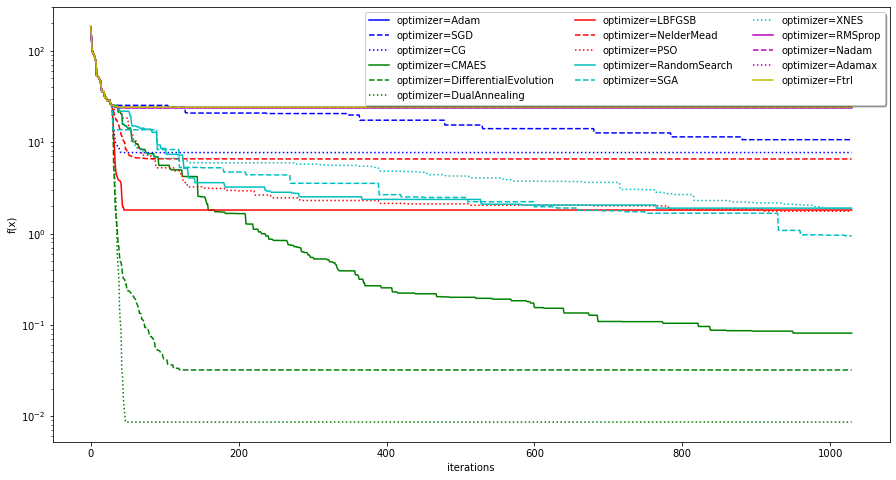

In [10]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.set_prop_cycle(cc)

for index, res in enumerate(x):
    ax = plot_results(res, ax)

leg = ax.legend(loc='upper right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)

fig.savefig(files[i]+'.png', dpi=300)

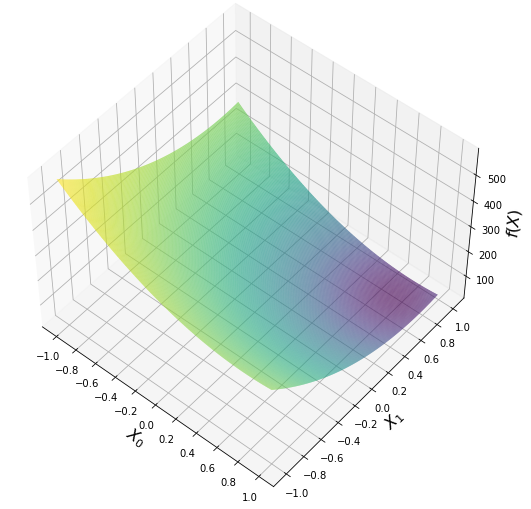

In [11]:
fig2, ax2 = x[0].function.plot(domain=np.tile([-1.,1.], (2,1)))
fig2.savefig(files[i]+'_3d.png', dpi=300)

NelderMead
[        input                     output
           x0        x1     x2         y
143  0.662868  0.700861 -0.439  1.664128,         input                        output
           x0        x1        x2         y
190  0.746602  0.819219 -0.420889  0.312915,         input                        output
           x0        x1        x2         y
198  0.715201  0.863603 -0.330335  2.412285,         input                         output
           x0        x1        x2          y
173  0.087199  0.848808 -0.475222  40.018316,         input                        output
           x0       x1        x2          y
226  0.762302  0.78963 -0.013402  19.238948]


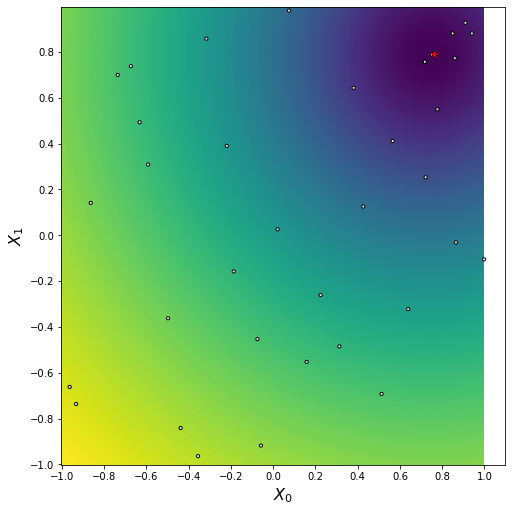

In [12]:
i = 7

x[i].function.plot_data(data=x[i].data[4],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

print([x[i].data[j].get_n_best_output_samples(1) for j in range(5)])

CMAES


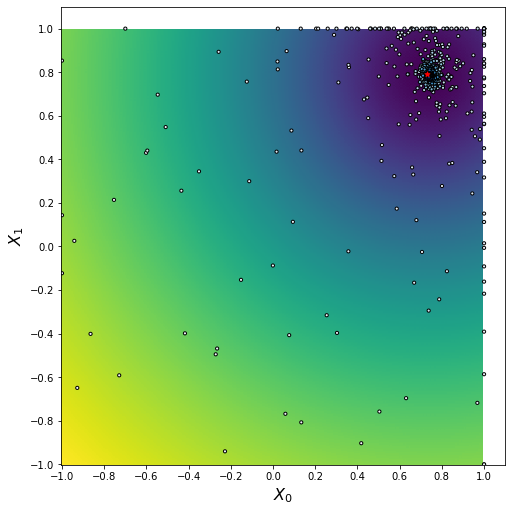

In [13]:
i = 3

x[i].function.plot_data(data=x[i].data[0],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

In [14]:
[xo.optimizer for xo in x]

['Adam',
 'SGD',
 'CG',
 'CMAES',
 'DifferentialEvolution',
 'DualAnnealing',
 'LBFGSB',
 'NelderMead',
 'PSO',
 'RandomSearch',
 'SGA',
 'XNES',
 'RMSprop',
 'Nadam',
 'Adamax',
 'Ftrl']

In [15]:
x[0].data[0].data

input                          output
            x0        x1        x2           y
0     0.956821  0.505895 -0.387799   12.891181
1    -0.941605  0.025930 -0.266689  316.306028
2     0.504038 -0.757643 -0.056001  240.264234
3    -0.728859 -0.591207  0.778692  513.237391
4     0.418108 -0.902865 -0.557166  271.833530
...        ...       ...       ...         ...
1025  0.955936  0.508529 -0.384669   11.988454
1026  0.955935  0.508529 -0.384669   11.988454
1027  0.955936  0.508529 -0.384669   11.988454
1028  0.955936  0.508529 -0.384669   11.988454
1029  0.955935  0.508530 -0.384669   11.988454

[1030 rows x 4 columns]